In [3]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#pip install wget

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=59ad8bf008f51bcdd72e8e9fdebb5dd61937d18e9e28f7869e111c60cfd687b8
  Stored in directory: c:\users\ander\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Get project files
import wget
wget.download('https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip', 'cats_and_dogs.zip')

#unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test2')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

HTTPError: HTTP Error 403: Forbidden

In [8]:
import random

numero_entero = random.randint(0, 1000)
print('Semilla : ', numero_entero)
tf.random.set_seed(numero_entero)
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test2')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Semilla :  492


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'cats_and_dogs\\test2'

In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                                                            directory=train_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            seed=42
                                                        )
val_data_gen = validation_image_generator.flow_from_directory(
                                                            directory=validation_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            seed=42
                                                        )
test_data_gen = test_image_generator.flow_from_directory(
                                                            directory="/content/cats_and_dogs/test2",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=False,
                                                            seed=42
                                                        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


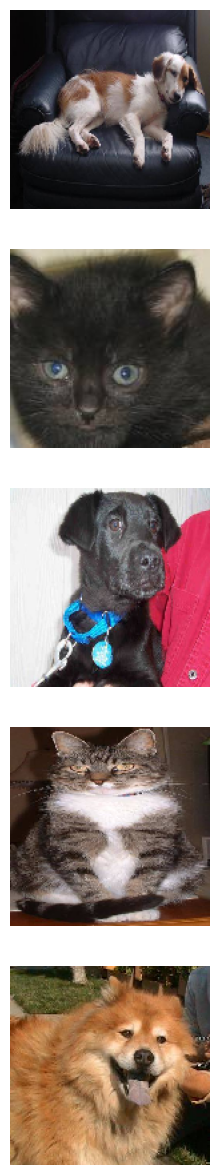

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(
                                          #featurewise_center=True,
                                          #featurewise_std_normalization=True,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          rescale=1./255,
                                          validation_split=0.2)


Found 2000 images belonging to 2 classes.


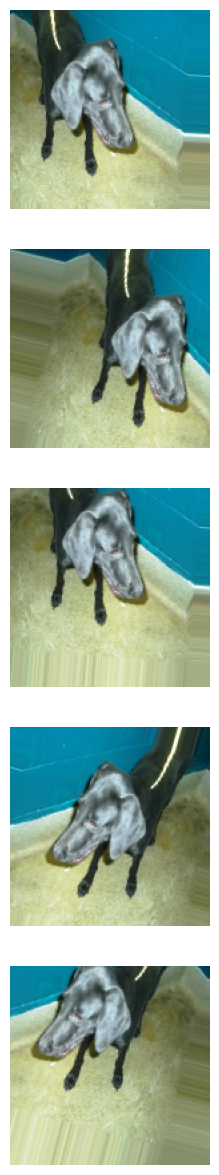

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


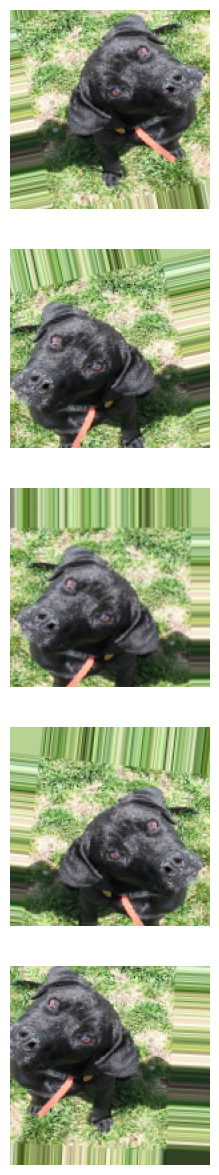

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [9]:
# 7
model = Sequential([
  #Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2)
])
# model = Sequential()

# # Add Conv2D and MaxPooling2D layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Flatten the output before the fully connected layer
# model.add(Flatten())

# # Add a fully connected layer with ReLU activation
# model.add(Dense(512, activation='relu'))

# # Output layer with softmax activation for class probabilities
# model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss="binary_crossentropy",
              metrics=['accuracy'])


#model.summary()

In [10]:
# 8
epochs=30

steps_per_epoch = len(train_data_gen)//batch_size

validation_steps = len(test_data_gen)//batch_size

history = model.fit(
  x=train_data_gen,
  #y = test_data_gen,
  steps_per_epoch=8,
  epochs=epochs,
  validation_data=val_data_gen,
  #validation_steps=128

)

Epoch 1/30
8/8 [==============================] - 42s 5s/step - loss: 0.9179 - accuracy: 0.5072 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 37s 4s/step - loss: 0.6926 - accuracy: 0.5195 - val_loss: 0.6914 - val_accuracy: 0.5020
Epoch 3/30
8/8 [==============================] - 38s 5s/step - loss: 0.6923 - accuracy: 0.4898 - val_loss: 0.6814 - val_accuracy: 0.5670
Epoch 4/30
8/8 [==============================] - 38s 5s/step - loss: 0.6866 - accuracy: 0.5420 - val_loss: 0.6675 - val_accuracy: 0.6060
Epoch 5/30
8/8 [==============================] - 34s 4s/step - loss: 0.6727 - accuracy: 0.5635 - val_loss: 0.6643 - val_accuracy: 0.5350
Epoch 6/30
8/8 [==============================] - 39s 5s/step - loss: 0.6644 - accuracy: 0.5869 - val_loss: 0.6323 - val_accuracy: 0.6190
Epoch 7/30
8/8 [==============================] - 34s 4s/step - loss: 0.6685 - accuracy: 0.5605 - val_loss: 0.6372 - val_accuracy: 0.6120
Epoch 8/30
8/8 [==================

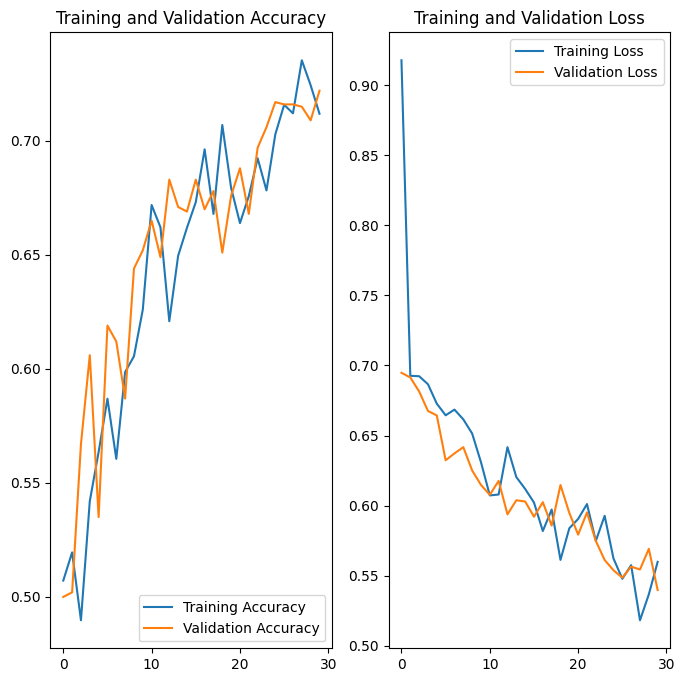

In [11]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
probabilitie = model.predict(test_data_gen)
print(probabilitie)
probabilitie = probabilitie.tolist()
type(probabilitie)
print(probabilitie)
#lista = [[max(0, min(1, round(elemento))) for elemento in sublista] for sublista in probabilitie]
#print(lista)
probabilities = [sublista[1] for sublista in probabilitie]
print(probabilities)
sample_test_images, _ = next(test_data_gen)
plotImages(sample_training_images, probabilities)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# probabilitie = model.predict(test_data_gen)
# print('probabilities: ', probabilitie)
# probabilitie = probabilitie.tolist()

# probabilities = [[max(0, min(1, round(elemento))) for elemento in sublista] for sublista in probabilitie]

# print(probabilitie)
# #probabilities = round(probabilities)
# print(probabilities)
# sample_test_images, _ = next(test_data_gen)
# plotImages(sample_training_images, probabilities)
#plotImages(test_data_gen, probabilities)

In [14]:
# 11

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 50.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
